In [15]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from random import sample, random, randint

from tensorflow import keras
from tensorflow.keras import layers, models
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.utils import to_categorical

In [16]:
(x_train, _), (x_test, _) = keras.datasets.mnist.load_data()
x_train = x_train / 255
x_test = x_test / 255

In [17]:
encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(100,activation="relu"),
    keras.layers.Dense(30,activation="relu")
])

encoder.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 100)               78500     
                                                                 
 dense_5 (Dense)             (None, 30)                3030      
                                                                 
Total params: 81530 (318.48 KB)
Trainable params: 81530 (318.48 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
decoder = keras.models.Sequential([
    keras.layers.Dense(100, activation="relu", input_shape=[30]),
    keras.layers.Dense(28*28, activation="sigmoid"),
    keras.layers.Reshape([28,28])
])

decoder.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 100)               3100      
                                                                 
 dense_7 (Dense)             (None, 784)               79184     
                                                                 
 reshape_1 (Reshape)         (None, 28, 28)            0         
                                                                 
Total params: 82284 (321.42 KB)
Trainable params: 82284 (321.42 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
autoencoder = keras.models.Sequential([encoder,decoder])
autoencoder.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_4 (Sequential)   (None, 30)                81530     
                                                                 


 sequential_5 (Sequential)   (None, 28, 28)            82284     
                                                                 
Total params: 163814 (639.90 KB)
Trainable params: 163814 (639.90 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
autoencoder.compile(loss="binary_crossentropy", optimizer="adam")

In [21]:
epochs = 1000

early_stopping_cb = keras.callbacks.EarlyStopping(patience=5,restore_best_weights=True)

history = autoencoder.fit(x_train,x_train,epochs=epochs,validation_data=[x_test,x_test],callbacks=[early_stopping_cb])

Epoch 1/1000
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1444 - val_loss: 0.1087
Epoch 2/1000
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1032 - val_loss: 0.0976
Epoch 3/1000
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0967 - val_loss: 0.0935
Epoch 4/1000
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0938 - val_loss: 0.0917
Epoch 5/1000
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0920 - val_loss: 0.0900
Epoch 6/1000
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0907 - val_loss: 0.0889
Epoch 7/1000
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0898 - val_loss: 0.0882
Epoch 8/1000
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0891 - val_loss: 0.0878
Epoch 9/1000
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0884 - val_loss: 0.0873
Epoch 10/1000
1875/1875 [==============================] - 4s 2m

<AxesSubplot:>

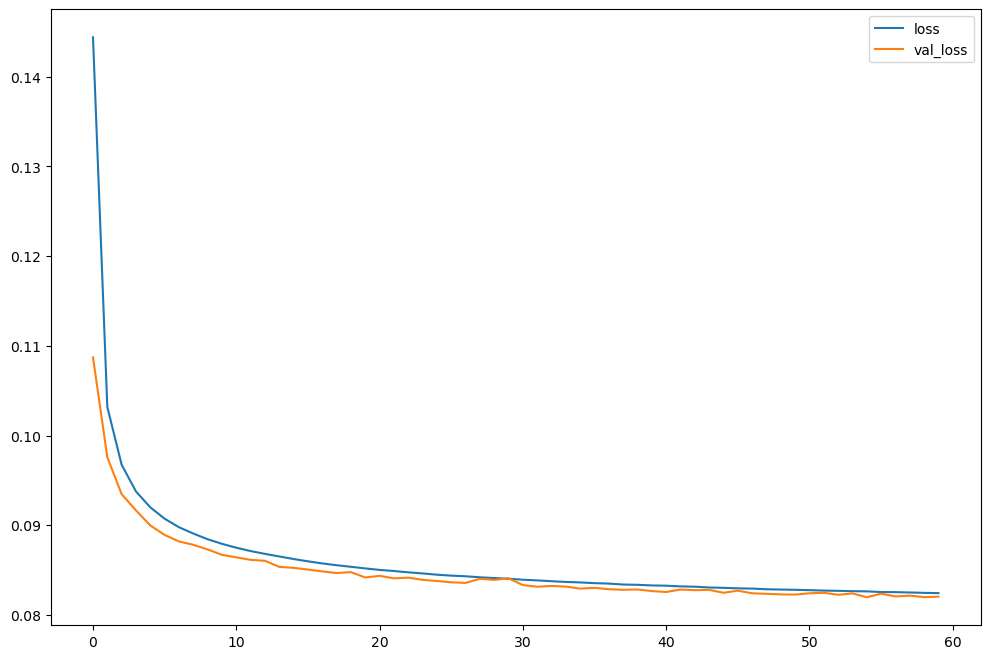

In [22]:
pd.DataFrame(history.history).plot(figsize=(12,8))

In [ ]:
for i in range(8):
    plt.subplot(2,8,i+1)
    pred = autoencoder.predict([x_test])
    plt.imshow(x_test[i], cmap="binary")

1/1 [==============================] - 0s 19ms/step


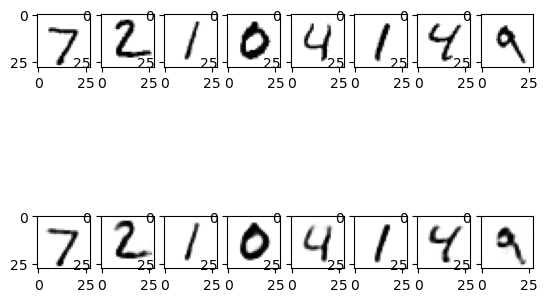

In [23]:
for i in range(8):
  plt.subplot(2,8, i+1)
  plt.imshow(x_test[i], cmap="binary")

  plt.subplot(2,8, i+8+1)
  pred = autoencoder.predict(x_test[i].reshape(1,28,28))
  imgpred = pred.reshape((28,28))
  plt.imshow(imgpred, cmap="binary")

In [26]:
ruido = np.random.random((28,28))/4
x_test_ruidoso = x_test + ruido
x_train_ruidoso = x_train + ruido

In [28]:
encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(30, activation="relu")
])
encoder.summary()
decoder = keras.models.Sequential([
    keras.layers.Dense(100, input_shape=[30], activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(28*28, activation="sigmoid"),
    keras.layers.Reshape([28,28])
])
decoder.summary()
autoencoder = keras.models.Sequential([encoder, decoder])
autoencoder.summary()
autoencoder.compile(loss="binary_crossentropy", optimizer="adam")

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_20 (Dense)            (None, 100)               78500     
                                                                 
 dense_21 (Dense)            (None, 100)               10100     
                                                                 
 dense_22 (Dense)            (None, 30)                3030      
                                                                 
Total params: 91630 (357.93 KB)
Trainable params: 91630 (357.93 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Par

In [29]:
history = autoencoder.fit(x_train_ruidoso,x_train,epochs=10,validation_data=[x_test_ruidoso,x_test])

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1573 - val_loss: 0.1198
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1146 - val_loss: 0.1083
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1066 - val_loss: 0.1027
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1020 - val_loss: 0.0990
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0987 - val_loss: 0.0959
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0962 - val_loss: 0.0937
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0938 - val_loss: 0.0925
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0923 - val_loss: 0.0911
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0913 - val_loss: 0.0901
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.090

1/1 [==============================] - 0s 8ms/step


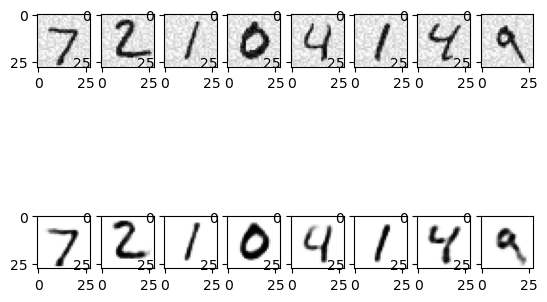

In [30]:
for i in range(8):
  plt.subplot(2,8, i+1)
  plt.imshow(x_test_ruidoso[i], cmap="binary")

  plt.subplot(2,8, i+8+1)
  pred = autoencoder.predict(x_test_ruidoso[i].reshape(1,28,28))
  imgpred = pred.reshape((28,28))
  plt.imshow(imgpred, cmap="binary")

### Autoencoder con redes convolucionales

In [31]:
encoder = keras.models.Sequential([
    keras.layers.Reshape([28, 28, 1], input_shape=[28, 28]),
    keras.layers.Conv2D(16, kernel_size=(3, 3), padding="same", activation="relu"),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Conv2D(32, kernel_size=(3, 3), padding="same", activation="relu"),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Conv2D(64, kernel_size=(3, 3), padding="same", activation="relu"),
    keras.layers.MaxPool2D(pool_size=2)
])
encoder.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_5 (Reshape)         (None, 28, 28, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 64)        

In [32]:
encoder.predict(x_test_ruidoso[0].reshape(1,28,28)).shape

1/1 [==============================] - 0s 82ms/step


(1, 3, 3, 64)

In [35]:
decoder = keras.models.Sequential([
    keras.layers.Conv2DTranspose(32, kernel_size=(3, 3), padding="valid", strides=2,
                                 activation="relu",  input_shape=[3, 3, 64]),
    keras.layers.Conv2DTranspose(16, kernel_size=(3, 3), strides=2, padding="same",
                                 activation="relu"),
    keras.layers.Conv2DTranspose(1, kernel_size=(3, 3), strides=2, padding="same",
                                 activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])
decoder.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_transpose_2 (Conv2D  (None, 7, 7, 32)          18464     
 Transpose)                                                      
                                                                 
 conv2d_transpose_3 (Conv2D  (None, 14, 14, 16)        4624      
 Transpose)                                                      
                                                                 
 conv2d_transpose_4 (Conv2D  (None, 28, 28, 1)         145       
 Transpose)                                                      
                                                                 
 reshape_6 (Reshape)         (None, 28, 28)            0         
                                                                 
Total params: 23233 (90.75 KB)
Trainable params: 23233 (90.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________

In [36]:
autoencoder = keras.models.Sequential([encoder, decoder])
autoencoder.summary()
autoencoder.compile(loss="binary_crossentropy", optimizer="adam")

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_15 (Sequential)  (None, 3, 3, 64)          23296     
                                                                 
 sequential_18 (Sequential)  (None, 28, 28)            23233     
                                                                 
Total params: 46529 (181.75 KB)
Trainable params: 46529 (181.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [37]:
history = autoencoder.fit(x_train,x_train,epochs=10,validation_data=[x_test,x_test])

Epoch 1/10
1875/1875 [==============================] - 22s 11ms/step - loss: 0.1205 - val_loss: 0.0841
Epoch 2/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0814 - val_loss: 0.0788
Epoch 3/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0773 - val_loss: 0.0756
Epoch 4/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0748 - val_loss: 0.0732
Epoch 5/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0731 - val_loss: 0.0717
Epoch 6/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0719 - val_loss: 0.0708
Epoch 7/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0710 - val_loss: 0.0701
Epoch 8/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0704 - val_loss: 0.0695
Epoch 9/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0699 - val_loss: 0.0689
Epoch 10/10
1875/1875 [==============================] - 20s 11m